In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sns.set() # set the default Seaborn style for graphics

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import accuracy_score

from collections import Counter

air_data = pd.read_csv("listings_june.csv")
air_data.shape

(4238, 74)

In [2]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')

C:\Users\junwe\AppData\Local\Temp/ipykernel_14816/1657301221.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


In [3]:
air_data["num_of_veri"]= air_data["host_verifications"].apply(lambda n: len(n.split(',')))
air_data["num_of_veri"].head()

0    9
1    8
2    9
3    5
4    5
Name: num_of_veri, dtype: int64

In [4]:
air_data["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
air_data["num_of_amenities"].head()

0     7
1    12
2     8
3    25
4    21
Name: num_of_amenities, dtype: int64

In [5]:
air_data["new_ratings"]=air_data["review_scores_rating"].round(1)
possible = pd.DataFrame(air_data[['host_total_listings_count','number_of_reviews_ltm','number_of_reviews','accommodates','num_of_veri','num_of_amenities','price','new_ratings']])
replace = ['host_total_listings_count','number_of_reviews_ltm','number_of_reviews','accommodates','num_of_veri','num_of_amenities','price']

In [6]:
possible.dropna(inplace=True)
ratings = possible['new_ratings']

In [7]:
y = pd.DataFrame(possible['new_ratings'])

X = pd.DataFrame(possible.drop('new_ratings',axis=1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
RegModel = KNeighborsRegressor(n_neighbors=2)
print(RegModel)


KNeighborsRegressor(n_neighbors=2)


In [43]:
from sklearn import neighbors
from math import sqrt
rmse_val = [] #to store rmse values for different k

for K in range(25):
    K =K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN=model.fit(X_train,y_train)
    prediction=KNN.predict(X_test)
    error = sqrt(mean_squared_error(y_test,prediction))
    rmse_val.append(error) #store rmse values


    print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
    print('RMSE value for k= ' , K , 'is:', error)
    print("Score: ", (model.score(X_test, y_test)))
    #print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

R2 Value: 0.904687105510172
RMSE value for k=  1 is: 1.2455983106584367
Score:  -0.8762376105687615
R2 Value: 0.501695418487557
RMSE value for k=  2 is: 1.07801257465352
Score:  -0.40533372954638947
R2 Value: 0.3923275027124672
RMSE value for k=  3 is: 1.0273018280990807
Score:  -0.27622702909402164
R2 Value: 0.3145635756073605
RMSE value for k=  4 is: 0.9865663339649957
Score:  -0.17702150832802555
R2 Value: 0.267588257549766
RMSE value for k=  5 is: 0.9606449853503571
Score:  -0.11598319914503263
R2 Value: 0.2203496255219376
RMSE value for k=  6 is: 0.9404609992623606
Score:  -0.06958030337443444
R2 Value: 0.215754053210097
RMSE value for k=  7 is: 0.9332657454103735
Score:  -0.053276677803382855
R2 Value: 0.21018388898625573
RMSE value for k=  8 is: 0.9194032841957326
Score:  -0.02221892692445393
R2 Value: 0.20341797877907197
RMSE value for k=  9 is: 0.9148105890113553
Score:  -0.012031854055667868
R2 Value: 0.19788458974951806
RMSE value for k=  10 is: 0.9054290795980756
Score:  0.

<AxesSubplot:>

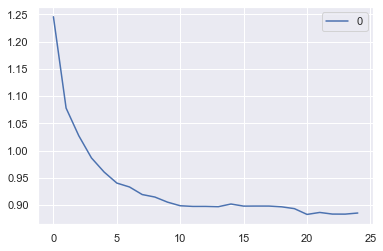

In [54]:
model = neighbors.KNeighborsRegressor(n_neighbors = 20)

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [55]:
y_test.info
#ok =pd.concat([y_test,prediction],axis=1, join='inner')
prediction

array([[4.544],
       [4.416],
       [4.708],
       [4.736],
       [4.308],
       [4.2  ],
       [4.448],
       [4.512],
       [4.6  ],
       [3.896],
       [4.468],
       [4.32 ],
       [4.552],
       [4.848],
       [4.328],
       [4.588],
       [4.84 ],
       [4.948],
       [4.368],
       [4.436],
       [4.768],
       [4.808],
       [4.776],
       [4.504],
       [4.228],
       [4.18 ],
       [4.192],
       [4.572],
       [4.472],
       [4.748],
       [4.332],
       [4.716],
       [4.48 ],
       [4.172],
       [4.448],
       [4.944],
       [4.604],
       [4.144],
       [4.5  ],
       [4.612],
       [4.704],
       [4.44 ],
       [4.328],
       [4.7  ],
       [4.46 ],
       [4.292],
       [4.432],
       [4.516],
       [4.728],
       [4.588],
       [3.968],
       [4.592],
       [3.816],
       [4.74 ],
       [4.516],
       [4.652],
       [4.612],
       [4.848],
       [4.364],
       [4.812],
       [4.78 ],
       [4.508],
       [

In [56]:
X_test

,host_total_listings_count,number_of_reviews_ltm,number_of_reviews,accommodates,num_of_veri,num_of_amenities,price
1080,14.0,0,17,2,8,27,128.0
2831,3.0,8,8,5,7,41,267.0
1180,6.0,2,4,2,4,49,130.0
2096,10.0,0,1,4,4,36,300.0
2249,11.0,0,8,2,3,15,51.0
...,...,...,...,...,...,...,...
1073,25.0,0,20,5,9,38,412.0
1735,127.0,0,1,1,5,18,35.0
3899,3.0,2,2,3,1,37,55.0
811,3.0,4,4,2,4,20,387.0


In [57]:
y_test

,new_ratings
1080,5.0
2831,4.8
1180,4.2
2096,5.0
2249,4.4
...,...
1073,4.7
1735,5.0
3899,5.0
811,4.0


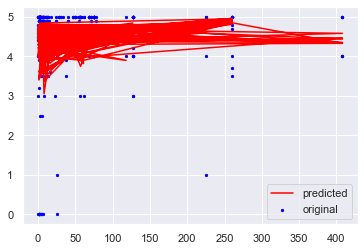

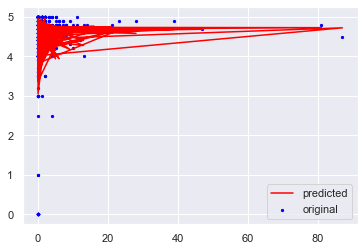

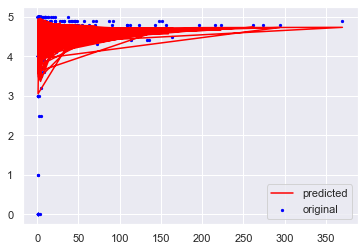

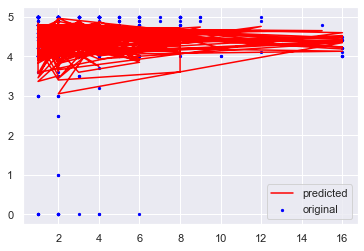

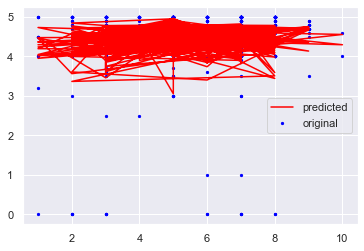

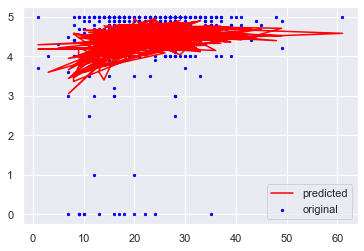

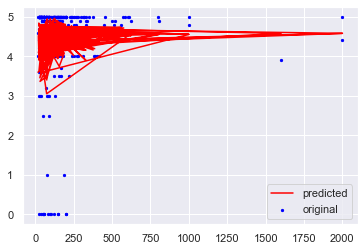

In [58]:
for i in range(7):
    plt.scatter(X_test.iloc[:,i], y_test, s=5, color="blue", label="original")
    plt.plot(X_test.iloc[:,i], prediction, lw=1.5, color="red", label="predicted")
    plt.legend()
    plt.show()

In [60]:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, prediction))
print('Max Error:', metrics.max_error(y_test, prediction))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, prediction))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, prediction))
print('R^2:', metrics.r2_score(y_test, prediction))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, prediction))

Explained Variance Score: 0.05226325801040832
Max Error: 4.652
Mean Squared Log Error: 0.08876491034636734
Median Absolute Error: 0.3280000000000003
R^2: 0.05179504946888791
Mean Poisson Deviance: 0.3077619834583597
